In [1]:
!pip install deep-translator

  Using cached deep_translator-1.11.4-py3-none-any.whl.metadata (30 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
Using cached deep_translator-1.11.4-py3-none-any.whl (42 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)


In [3]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from deep_translator import GoogleTranslator

In [23]:
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/duart3x/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/duart3x/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/duart3x/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/duart3x/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/duart3x/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [5]:
# Step 2: Load the dataset
file_path = "results-publico-translated.csv"
columns = ["term", "url", "text", "title", "translated_text"]
df = pd.read_csv(file_path, header=1,  names=columns)

In [6]:
# Check for missing values; address any missing data if necessary
has_missing = df.isnull().values.any()
if has_missing:
    print('Missing values found. Dropping rows with missing values.')
    df.dropna(inplace=True)
else:
    print('No missing values found.')
df['text'] = df['text'].str.strip().str.lower()
df.drop_duplicates(subset='text', keep='first', inplace=True)

Missing values found. Dropping rows with missing values.


In [7]:
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

stop_words.add('goes')
stop_words.add('newspaper')
stop_words.add('journalist')
stop_words.add('journalists')
stop_words.add('pt')
stop_words.add('rsf')
stop_words.add('aacs')
stop_words.add('still')
stop_words.add('year')
stop_words.add('today')
stop_words.add('day')
stop_words.add('to have')
stop_words.add('about')
stop_words.add('hurts')
stop_words.add('yesterday')
stop_words.add('where')
stop_words.add('one')
stop_words.add('two')
stop_words.add('three')
stop_words.add('four')
stop_words.add('five')
stop_words.add('six')
stop_words.add('seven')
stop_words.add('eight')
stop_words.add('nine')
stop_words.add('ten')
stop_words.add('because')
stop_words.add('years')
stop_words.add('said')

# Tokenize the text
def tokenize(text):
    tokens = word_tokenize(text, language='english')
    for token in tokens:
        lword = token.lower()
        if lword.isalpha() and (lword not in stop_words) and (len(lword) > 2):
            lemWord = lemmatizer.lemmatize(lword)
            yield lemWord 
            

# Step 3: Tokenize the text
df['tokens'] = df['translated_text'].apply(lambda x: [t for t in tokenize(x)])
# join the tokens back into a single string
df['cleaned_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df.head()

,term,url,text,title,translated_text,tokens,cleaned_text
0,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200802290423...,"a proposta, que será apresentada na assembleia...",PÚBLICO.PT,"The proposal, which will be presented at the g...","[proposal, presented, general, shareholder, me...",proposal presented general shareholder meeting...
1,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200802290428...,"na comissão executiva desde o início do ano, h...",PÚBLICO.PT,On the executive committee since the beginning...,"[executive, committee, since, beginning, henri...",executive committee since beginning henrique g...
2,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200503240713...,público - edição impressa - destaque director...,PUBLICO.PT,Público - printed edition - featured director:...,"[público, printed, edition, featured, director...",público printed edition featured director josé...
3,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200802290434...,"miguel angel garçon, da telefónica, disse à lu...",PÚBLICO.PT,"Miguel Angel Garçon, from Telefónica, told Lus...","[miguel, angel, garçon, telefónica, told, lusa...",miguel angel garçon telefónica told lusa compa...
4,ABEL BAPTISTA,https://arquivo.pt/noFrame/replay/200503241002...,público - edição impressa - destaque director...,PUBLICO.PT,public - print edition - highlights director: ...,"[public, print, edition, highlight, director, ...",public print edition highlight director josé m...


In [9]:
# Step 3: Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Step 4: Analyze Sentiment
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

df['compound_score'] = df['cleaned_text'].apply(analyze_sentiment)

# Step 5: Map Compound Scores to Sentiment Labels
def map_sentiment(compound):
    return "positive" if compound > 0 else "negative"

df['sentiment'] = df['compound_score'].apply(map_sentiment)

# Step 6: Save results or preview
print(df[['text', 'compound_score', 'sentiment']].head())

                                                text  compound_score sentiment
0  a proposta, que será apresentada na assembleia...          0.7096  positive
1  na comissão executiva desde o início do ano, h...          0.9883  positive
2  público - edição impressa - destaque  director...          0.9413  positive
3  miguel angel garçon, da telefónica, disse à lu...          0.9423  positive
4  público - edição impressa - destaque  director...         -0.8827  negative


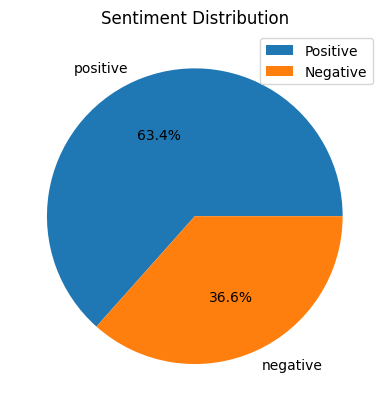

In [ ]:
import matplotlib.pyplot as plt

# plot the sentiment distribution
fig = df['sentiment'].value_counts().plot(kind="pie",  autopct='%1.1f%%')
fig.set_title('Sentiment Distribution')
fig.set_ylabel('')
fig.set_xlabel('')
fig.legend(labels=['Positive', 'Negative'])
plt.show()

In [34]:
# Get the most common Names of People in negative and positive texts
from collections import Counter
import json

with open("./Legislaturas/X.json") as json_file:
    legislature_json = json.load(json_file)

legislature = legislature_json["Legislatura"]

l_init_date = legislature["DetalheLegislatura"]["dtini"]  # 2005-03-10
l_end_date = legislature["DetalheLegislatura"]["dtfim"]  # 2009-10-14

deputies = legislature["Deputados"]["pt_ar_wsgode_objectos_DadosDeputadoSearch"]
parties = legislature["GruposParlamentares"]["pt_gov_ar_objectos_GPOut"]

dp_df = pd.DataFrame(deputies, columns=['depId','depNomeParlamentar'])
party_df = pd.DataFrame(parties)

def get_people_names(text):
    people_names = []
    # Do not tokenize
    deputies_names = dp_df['depNomeParlamentar'].values
    for name in deputies_names:
        if name.lower() in text:
            people_names.append(name)

    return people_names


df['people_names'] = df['text'].apply(get_people_names)
print(df[['tokens', 'people_names']].head())

                                              tokens  \
0  [proposal, presented, general, shareholder, me...   
1  [executive, committee, since, beginning, henri...   
2  [público, printed, edition, featured, director...   
3  [miguel, angel, garçon, telefónica, told, lusa...   
4  [public, print, edition, highlight, director, ...   

                                        people_names  
0                                                 []  
1                                                 []  
2  [JOSÉ SÓCRATES, MANUEL MARIA CARRILHO, MARIA C...  
3                                                 []  
4  [JOSÉ SÓCRATES, MANUEL MARIA CARRILHO, MARIA C...  


In [35]:
# Get the most common names of people in positive and negative texts
positive_people_names = [name for names in df[df['sentiment'] == 'positive']['people_names'] for name in names]
negative_people_names = [name for names in df[df['sentiment'] == 'negative']['people_names'] for name in names]

positive_people_names_counter = Counter(positive_people_names)
negative_people_names_counter = Counter(negative_people_names)

print('Most common names of people in positive texts:', positive_people_names_counter.most_common(5))
print('Most common names of people in negative texts:', negative_people_names_counter.most_common(5))

Most common names of people in positive texts: [('FERRO RODRIGUES', 14), ('MANUELA DE MELO', 14), ('VIEIRA DA SILVA', 14), ('ANTÓNIO VITORINO', 13), ('AUGUSTO SANTOS SILVA', 13)]
Most common names of people in negative texts: [('EUGÉNIO ROSA', 7), ('JOSÉ SÓCRATES', 4), ('FERRO RODRIGUES', 4), ('ALBERTO COSTA', 3), ('ANTÓNIO VITORINO', 3)]
